In [7]:
# Import Libraries 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import normalize
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import scipy.cluster.hierarchy as sch
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import statistics
from sklearn.tree import export_graphviz

In [3]:
# Load the file
m=pd.read_csv("C:/Users/kfeng3/Desktop/cleaneddatafinal2.csv")
m.head()

,release_date,title,original_language,popularity,production_companies,production_countries,adjbudget,adjrevenue,runtime,spoken_languages,vote_average,vote_count,genres
0,9/4/1916,Intolerance,1,0,0,1,4.163937e+05,9.057936e+06,197,1,7.4,60,8
1,1/10/1927,Metropolis,0,1,1,0,9.104546e+07,6.393648e+05,153,0,8.0,657,8
2,1/30/1929,Pandora's Box,0,0,0,0,1.500000e+07,2.036248e+07,109,0,7.6,45,8
3,2/8/1929,The Broadway Melody,1,0,0,1,3.790000e+05,4.358000e+06,100,1,5.0,19,8
4,11/15/1930,Hell's Angels,1,0,0,1,3.859150e+06,7.816000e+06,127,0,6.1,19,10


In [4]:
movie=m.drop(columns=["release_date", "title"])
movie.head()

,original_language,popularity,production_companies,production_countries,adjbudget,adjrevenue,runtime,spoken_languages,vote_average,vote_count,genres
0,1,0,0,1,4.163937e+05,9.057936e+06,197,1,7.4,60,8
1,0,1,1,0,9.104546e+07,6.393648e+05,153,0,8.0,657,8
2,0,0,0,0,1.500000e+07,2.036248e+07,109,0,7.6,45,8
3,1,0,0,1,3.790000e+05,4.358000e+06,100,1,5.0,19,8
4,1,0,0,1,3.859150e+06,7.816000e+06,127,0,6.1,19,10


In [5]:
# Splitting the Data into Training and Testing (80%, 20%)
mtrain1, mtest1, pop_train1, pop_test1=train_test_split(movie, movie["popularity"], test_size=0.33, random_state=42)

In [6]:
#Discretization (Numeric Variables)
mtrain1.head()

,original_language,popularity,production_companies,production_countries,adjbudget,adjrevenue,runtime,spoken_languages,vote_average,vote_count,genres
1488,1,1,0,1,22616000.0,3.473423e+07,104,1,6.4,480,11
841,1,1,0,1,82400000.0,3.187775e+08,117,1,6.4,470,10
3560,1,1,1,1,70449000.0,1.146227e+08,94,1,5.5,1269,10
2835,1,1,0,1,72660000.0,2.345786e+08,104,0,6.4,1813,11
965,1,0,1,1,8128000.0,1.773938e+07,82,1,6.4,177,11


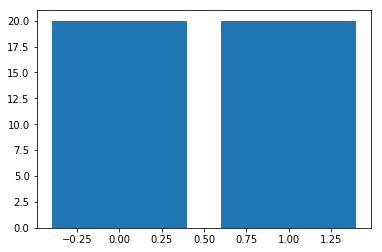

In [38]:
ax=plt.bar(mtrain1["popularity"], height=20)

In [49]:
#Setting up Bins
#Bins for Vote Avergage 
def voteave_bin(vb):
    if vb > statistics.mean(mtrain1["vote_average"]):
        return 2
    else:
        return 1
mtrain1["vote_average"] =mtrain1["vote_average"].apply(voteave_bin)
mtrain1.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,original_language,popularity,production_companies,production_countries,adjbudget,adjrevenue,runtime,spoken_languages,vote_average,vote_count,genres
1488,1,1,0,1,22616000.0,3.473423e+07,104,1,2,480,11
841,1,1,0,1,82400000.0,3.187775e+08,117,1,2,470,10
3560,1,1,1,1,70449000.0,1.146227e+08,94,1,1,1269,10
2835,1,1,0,1,72660000.0,2.345786e+08,104,0,2,1813,11
965,1,0,1,1,8128000.0,1.773938e+07,82,1,2,177,11


In [50]:
#Bins for Vote Count
def votecount_bin(va):
    if va > statistics.mean(mtrain1["vote_count"]):
        return 2
    else:
        return 1
mtrain1["vote_count"]=mtrain1["vote_count"].apply(votecount_bin)
mtrain1.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,original_language,popularity,production_companies,production_countries,adjbudget,adjrevenue,runtime,spoken_languages,vote_average,vote_count,genres
1488,1,1,0,1,22616000.0,3.473423e+07,104,1,2,1,11
841,1,1,0,1,82400000.0,3.187775e+08,117,1,2,1,10
3560,1,1,1,1,70449000.0,1.146227e+08,94,1,1,2,10
2835,1,1,0,1,72660000.0,2.345786e+08,104,0,2,2,11
965,1,0,1,1,8128000.0,1.773938e+07,82,1,2,1,11


In [8]:
#Bins for Budget
def adjbudget_bin(bb):
    if bb > statistics.mean(mtrain1["adjbudget"]):
        return 2
    else:
        return 1
mtrain1["adjbudget"]=mtrain1["adjbudget"].apply(adjbudget_bin)
mtrain1.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,original_language,popularity,production_companies,production_countries,adjbudget,adjrevenue,runtime,spoken_languages,vote_average,vote_count,genres
1488,1,1,0,1,1,3.473423e+07,104,1,6.4,480,11
841,1,1,0,1,2,3.187775e+08,117,1,6.4,470,10
3560,1,1,1,1,2,1.146227e+08,94,1,5.5,1269,10
2835,1,1,0,1,2,2.345786e+08,104,0,6.4,1813,11
965,1,0,1,1,1,1.773938e+07,82,1,6.4,177,11


In [9]:
#Bins for Revenue
def adjrevenue_bin(rb):
    if rb > statistics.mean(mtrain1["adjrevenue"]):
        return 2
    else:
        return 1
mtrain1["adjrevenue"] =mtrain1["adjrevenue"].apply(adjrevenue_bin)
mtrain1.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,original_language,popularity,production_companies,production_countries,adjbudget,adjrevenue,runtime,spoken_languages,vote_average,vote_count,genres
1488,1,1,0,1,1,1,104,1,6.4,480,11
841,1,1,0,1,2,2,117,1,6.4,470,10
3560,1,1,1,1,2,2,94,1,5.5,1269,10
2835,1,1,0,1,2,2,104,0,6.4,1813,11
965,1,0,1,1,1,1,82,1,6.4,177,11


In [11]:
#Bins for Runtime
def runtime_bin(bb):
    if bb > statistics.mean(mtrain1["runtime"]):
        return 2
    else:
        return 1
mtrain1["runtime"] =mtrain1["runtime"].apply(runtime_bin)
mtrain1.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,original_language,popularity,production_companies,production_countries,adjbudget,adjrevenue,runtime,spoken_languages,vote_average,vote_count,genres
1488,1,1,0,1,1,1,1,1,6.4,480,11
841,1,1,0,1,2,2,2,1,6.4,470,10
3560,1,1,1,1,2,2,1,1,5.5,1269,10
2835,1,1,0,1,2,2,1,0,6.4,1813,11
965,1,0,1,1,1,1,1,1,6.4,177,11


In [12]:
#Build the Classifier---Gini
dtreegini = tree.DecisionTreeClassifier(criterion="gini", max_depth=8, random_state=0, min_samples_leaf=600)
dtreegini.fit(mtrain1, pop_train1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=600, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [70]:
#Predict the class---Classifier Gini
y_pred = dtreegini.predict(mtest1)
y_pred
y_pred1=dtreegini.predict(mtrain1)
y_pred1

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [68]:
#Check the accuracy rate---Classifier Gini
count_misclassified = (pop_test1 != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(pop_test1, y_pred)
print('Accuracy for Testing: {:.2f}'.format(accuracy))
accuracytrain = metrics.accuracy_score(pop_train1, y_pred1)
print('Accuracy for Training: {:.2f}'.format(accuracy))

Misclassified samples: 718
Accuracy for Testing: 0.50
Accuracy for Training: 0.50


In [75]:

from sklearn.tree import export_graphviz  
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(dtreegini, out_file ='tree.dot', 
               feature_names=["original_language","popularity", "production_companies", "production countries", "adjbudget", "adjrevenue",
                              "runtime", "spoken_language","vote_average","vote_count", "genres"])


In [31]:
#Build the Classifier---Entropy 
clf_en=DecisionTreeClassifier(class_weight=None, criterion="entropy", max_depth=10,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=30,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')
clf_en.fit(mtrain1, pop_train1)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [26]:
#Predict the class---Classifier Entropy
y_pred1=clf_en.predict(mtest1)
y_pred1

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [27]:
#Check the accuracy rate---Classifier Entropy
print("The Accuracy Rate is: " + str(metrics.accuracy_score(pop_test1, y_pred)))

The Accuracy Rate is: 0.500347947112039
